https://towardsdatascience.com/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import SpectralClustering

In [2]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()
from tqdm.notebook import tqdm
import csv

In [5]:
df = pd.read_csv('covtypeDataset/benign_traffic.csv')
df = df.mask(np.random.choice([True, False], size=df.shape, p=[.70,.30]))
df = df.loc[0:10000]
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
1,1.000000,354.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.218830e+01,NaN,0.000000e+00
2,NaN,NaN,35.789338,1.912127,360.275733,NaN,1.969807,360.091968,NaN,1.996939,...,NaN,NaN,NaN,6.318264,NaN,9.034660e+00,NaN,NaN,NaN,NaN
3,1.000000,NaN,NaN,NaN,337.000000,NaN,NaN,337.000000,NaN,1.000000,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,1.680223,172.140917,18487.448750,1.793580,NaN,NaN,1.925828,NaN,19153.795810,NaN,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3.941523,102.000000,NaN,NaN,NaN,0.0,NaN,NaN,0.000014,NaN,...,4.070000e-12,2.420000e-48,9.400000e-37,NaN,NaN,NaN,NaN,NaN,8.590000e-29,0.000000e+00
9997,NaN,99.821890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.611770,...,NaN,NaN,NaN,5.305289,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,0.000561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,2.430000e-33,NaN,7.870542,NaN,1.170000e-06,NaN,1.640000e-12,NaN,NaN
9999,NaN,NaN,0.000000,NaN,98.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,3.020000e-37,NaN,5.306509,98.0,NaN,NaN,NaN,NaN,-1.310000e-17


In [6]:
table2=df
x,y=table2.shape
print(x,y)

10001 115


In [8]:
for k in tqdm(range(100)):
    W=[[0.0 for i in range(x)] for j in range(x)]
    for i in range(x):
        for j in range(i+1,x,1):
            z=table2[i:i+1:].append(table2[j:j+1:], ignore_index=True)
            z=z.dropna(axis=1)
            if z.shape[1] == 0:
                continue
            W[i][j]=W[j][i]=pairwise_distances(z.values,metric="l1")[0][1]
            del(z)
#         print(i)
print(W)
with open("similarityGraph22.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(W)

KeyboardInterrupt: 

In [7]:
df = pd.read_csv("similarityGraph2.csv",header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'similarityGraph2.csv'

In [7]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,8569,8570,8571,8572,8573,8574,8575,8576,8577,8578
0,0.00000,5466.50834,5013.406317,4178.837200,4471.965500,4179.921670,4456.496300,3172.189500,5563.663900,4248.286400,...,111.35000,1920.754800,4837.31670,347.018600,6485.101833,4006.537500,9342.830000,1020.428600,5834.36200,782.05970
1,5466.50834,0.00000,513.860357,1391.245553,1058.574453,1374.575223,1074.803053,2343.337787,164.332253,1313.540753,...,5367.09166,3643.186873,650.87392,5092.330847,1282.461107,1506.553653,4016.988327,4531.970273,435.36242,4846.15136


In [8]:
kk=df.values.tolist()
len(kk)

8579

In [81]:
kkk=np.array(kk)
kkk=kkk[:500,:500]
kkk

array([[0.000, 5466.508, 5013.406, ..., 4586.216, 507.829, 6778.529],
       [5466.508, 0.000, 513.860, ..., 1273.517, 4999.496, 1575.154],
       [5013.406, 513.860, 0.000, ..., 870.830, 4631.085, 1971.348],
       ...,
       [4586.216, 1273.517, 870.830, ..., 0.000, 4314.687, 2340.563],
       [507.829, 4999.496, 4631.085, ..., 4314.687, 0.000, 6491.750],
       [6778.529, 1575.154, 1971.348, ..., 2340.563, 6491.750, 0.000]])

In [9]:
vectorizer = np.vectorize(lambda x: 1 if x < 2000 else 0)

Ww = np.vectorize(vectorizer)(kk)

In [10]:
# degree matrix
D = np.diag(np.sum(np.array(Ww), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - Ww
print('laplacian matrix:')
print(L)

degree matrix:
[[5217    0    0 ...    0    0    0]
 [   0 1842    0 ...    0    0    0]
 [   0    0 1902 ...    0    0    0]
 ...
 [   0    0    0 ... 5736    0    0]
 [   0    0    0 ...    0 1747    0]
 [   0    0    0 ...    0    0 5652]]
laplacian matrix:
[[5216    0    0 ...   -1    0   -1]
 [   0 1841   -1 ...    0   -1    0]
 [   0   -1 1901 ...    0   -1    0]
 ...
 [  -1    0    0 ... 5735    0   -1]
 [   0   -1   -1 ...    0 1746    0]
 [  -1    0    0 ...   -1    0 5651]]


In [11]:
e, v = np.linalg.eigh(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)


eigenvalues:
[-0.000 43.000 91.847 ... 8579.000 8579.000 8579.000]
eigenvectors:
[[-0.011 0.000 -0.001 ... -0.001 0.000 0.000]
 [-0.011 0.000 0.000 ... -0.001 0.000 -0.000]
 [-0.011 0.000 0.000 ... -0.001 0.000 -0.000]
 ...
 [-0.011 0.000 -0.001 ... -0.001 -0.000 -0.000]
 [-0.011 0.000 0.001 ... -0.001 -0.000 0.000]
 [-0.011 0.000 -0.001 ... -0.001 0.000 -0.000]]


In [12]:
np.where(e<0.01)

(array([0]),)

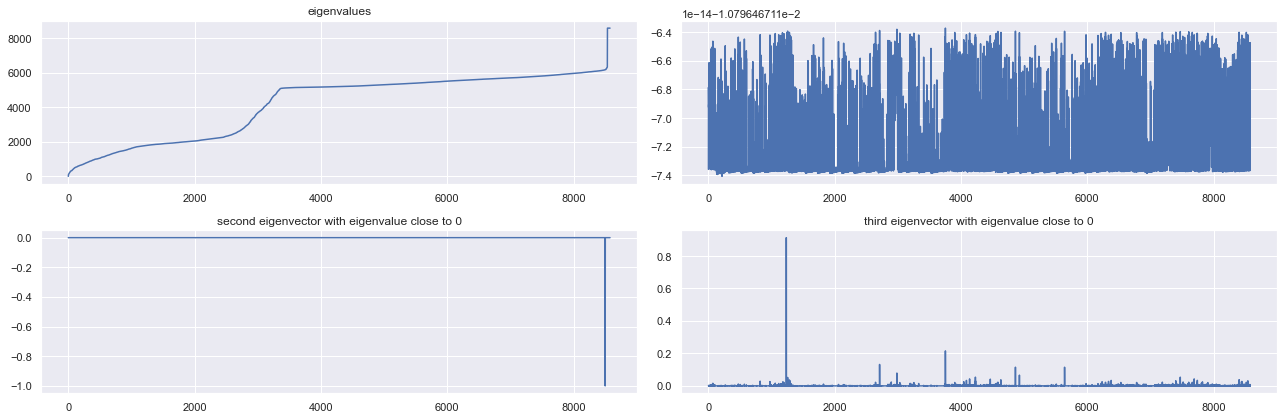

In [13]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 150)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()


In [14]:
U = np.array(v[:, i[0]])


In [15]:
km = KMeans(init='k-means++', n_clusters=4)
km.fit(U.reshape(-1, 1))
km.labels_

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

In [16]:
len(km.labels_)

8579

In [17]:
#table3=table3.iloc[:500,:]
table3["Cluster"]=km.labels_
#table3

# centroids = clusters' center points
#centroids = cluster.cluster_centers_
title="RelativeHumidity"
weather_clusters=table3[["Lat","Longt","Cluster",title]]
#print(weather_clusters)
weather_clusters.to_csv('ClusteredDatanew.csv', index=False)


In [20]:
table4 =table2
table4["Cluster"]=km.labels_
table4.loc[table3['Cluster'] == 3]

,AirTemp,Alt,DewPoint,Pressure,RelativeHumidity,Visibility,WindDirection,WindGust,WindSpeed,Lat,Longt,Cluster
7,101.500000,3092.0,NaN,26.6900,NaN,NaN,252.25,20.00,13.00,36.8033,-115.9772,3
18,99.000000,3676.0,NaN,26.0725,NaN,NaN,193.75,20.25,12.75,36.6614,-116.0050,3
20,103.000000,2787.0,45.875,27.0000,14.75,NaN,193.25,16.75,9.25,36.6856,-116.4069,3
21,98.500000,3631.0,NaN,NaN,NaN,NaN,223.75,15.75,7.50,36.9006,-116.0428,3
22,102.250000,3160.0,34.675,NaN,9.75,NaN,244.00,16.75,11.25,36.8436,-115.9083,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,42.533333,2949.0,NaN,NaN,NaN,NaN,0.00,0.00,0.00,47.9900,-114.0600,3
8526,102.000000,3440.0,26.300,NaN,7.00,NaN,212.00,18.00,10.00,37.2161,-113.3778,3
8528,89.000000,2610.0,42.700,NaN,20.00,NaN,300.00,10.00,5.00,43.5114,-102.4969,3
8561,98.000000,3180.0,34.500,NaN,11.00,NaN,137.00,16.00,7.00,36.4367,-115.3314,3


Cluster0 Size: 5561 , Cluster1 Size: 1260 , Cluster2 Size: 1018 , Cluster3 Size: 740
max_c0: nan  min_c0: nan Color:R
max_c1: 655.0  min_c1: 0.0 Color:G
max_c2: 100.0  min_c2: 0.0 Color:B
max_c3: nan  min_c3: nan Color:Y


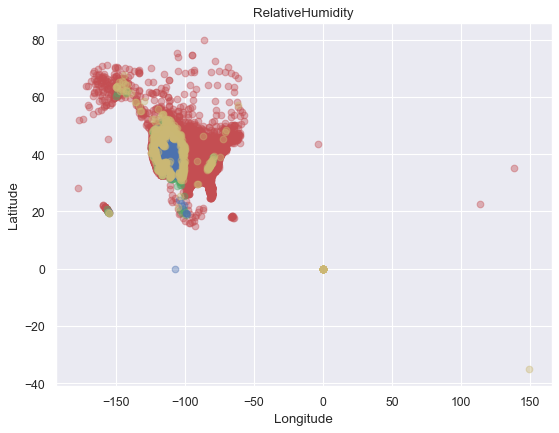

In [18]:
# plotting clusters
k=4
plt.figure(num=None, figsize=(8, 6), dpi=80)
if k==2:
    x_0=weather_clusters[weather_clusters.Cluster==0]["Longt"]
    y_0=weather_clusters[weather_clusters.Cluster == 0]["Lat"]
    c1=pl.scatter(x_0,y_0,c='r',marker='o',alpha=0.4)
    x_1=weather_clusters[weather_clusters.Cluster==1]["Longt"]
    y_1=weather_clusters[weather_clusters.Cluster == 1]["Lat"]
    c2=pl.scatter(x_1,y_1,c='g',marker='o',alpha=0.4)
    # Numbers of Elements in Clusters
    print("Cluster0 Size:",len(x_0), ", Cluster1 Size:",len(x_1))

    # Print Cluster Max, Min Points to determine Cluster Seperation Point
    max_c0 = max(weather_clusters[weather_clusters.Cluster == 0][title])
    min_c0 = min(weather_clusters[weather_clusters.Cluster == 0][title])
    print("max_c0:", max_c0, " min_c0:", min_c0, "Color:R")
    max_c1 = max(weather_clusters[weather_clusters.Cluster == 1][title])
    min_c1 = min(weather_clusters[weather_clusters.Cluster == 1][title])
    print("max_c1:", max_c1, " min_c1:", min_c1, "Color:G")

elif k==3:
    x_0 = weather_clusters[weather_clusters.Cluster == 0]["Longt"]
    y_0 = weather_clusters[weather_clusters.Cluster == 0]["Lat"]
    c1 = pl.scatter(x_0, y_0, c='r', marker='o', alpha=0.4)
    x_1 = weather_clusters[weather_clusters.Cluster == 1]["Longt"]
    y_1 = weather_clusters[weather_clusters.Cluster == 1]["Lat"]
    c2 = pl.scatter(x_1, y_1, c='g', marker='o', alpha=0.4)
    # for sensor fault visibility in figure
    # c2 = pl.scatter(x_1, y_1, c='b', marker='x', alpha=1, s=300, linewidths=4, zorder=10)
    x_2=weather_clusters[weather_clusters.Cluster==2]["Longt"]
    y_2=weather_clusters[weather_clusters.Cluster == 2]["Lat"]
    #c3 = pl.scatter(x_2, y_2, c='b', marker='x', alpha=1, s=300, linewidths=4, zorder=10)
    c3=pl.scatter(x_2,y_2,c='b',marker='o', alpha=0.4)
    # Numbers of Elements in Clusters
    print("Cluster0 Size:", len(x_0), ", Cluster1 Size:", len(x_1), ", Cluster2 Size:", len(x_2))

    # Print Cluster Max, Min Points to determine Cluster Seperation Point
    max_c0 = max(weather_clusters[weather_clusters.Cluster == 0][title])
    min_c0 = min(weather_clusters[weather_clusters.Cluster == 0][title])
    print("max_c0:", max_c0, " min_c0:", min_c0, "Color:R")
    max_c1 = max(weather_clusters[weather_clusters.Cluster == 1][title])
    min_c1 = min(weather_clusters[weather_clusters.Cluster == 1][title])
    print("max_c1:", max_c1, " min_c1:", min_c1, "Color:G")
    max_c2 = max(weather_clusters[weather_clusters.Cluster == 2][title])
    min_c2 = min(weather_clusters[weather_clusters.Cluster == 2][title])
    print("max_c2:", max_c2, " min_c2:", min_c2, "Color:B")
elif k==4:
    x_0 = weather_clusters[weather_clusters.Cluster == 0]["Longt"]
    y_0 = weather_clusters[weather_clusters.Cluster == 0]["Lat"]
    c1 = pl.scatter(x_0, y_0, c='r', marker='o', alpha=0.4)
    x_1 = weather_clusters[weather_clusters.Cluster == 1]["Longt"]
    y_1 = weather_clusters[weather_clusters.Cluster == 1]["Lat"]
    #c2 = pl.scatter(x_1, y_1, c='g', marker='x', alpha=0.8, s=169, linewidths=3, zorder=10)
    c2 = pl.scatter(x_1, y_1, c='g', marker='o', alpha=0.4)
    x_2 = weather_clusters[weather_clusters.Cluster == 2]["Longt"]
    y_2 = weather_clusters[weather_clusters.Cluster == 2]["Lat"]
    c3 = pl.scatter(x_2, y_2, c='b', marker='o', alpha=0.4)
    x_3=weather_clusters[weather_clusters.Cluster==3]["Longt"]
    y_3=weather_clusters[weather_clusters.Cluster == 3]["Lat"]
    c3=pl.scatter(x_3,y_3,c='y',marker='o', alpha=0.4)
    # Numbers of Elements in Clusters
    print("Cluster0 Size:", len(x_0), ", Cluster1 Size:", len(x_1), ", Cluster2 Size:", len(x_2), ", Cluster3 Size:", len(x_3))

    # Print Cluster Max, Min Points to determine Cluster Seperation Point
    max_c0 = max(weather_clusters[weather_clusters.Cluster == 0][title])
    min_c0 = min(weather_clusters[weather_clusters.Cluster == 0][title])
    print("max_c0:", max_c0, " min_c0:", min_c0, "Color:R")
    max_c1 = max(weather_clusters[weather_clusters.Cluster == 1][title])
    min_c1 = min(weather_clusters[weather_clusters.Cluster == 1][title])
    print("max_c1:", max_c1, " min_c1:", min_c1, "Color:G")
    max_c2 = max(weather_clusters[weather_clusters.Cluster == 2][title])
    min_c2 = min(weather_clusters[weather_clusters.Cluster == 2][title])
    print("max_c2:", max_c2, " min_c2:", min_c2, "Color:B")
    max_c3 = max(weather_clusters[weather_clusters.Cluster == 3][title])
    min_c3 = min(weather_clusters[weather_clusters.Cluster == 3][title])
    print("max_c3:", max_c3, " min_c3:", min_c3, "Color:Y")

pl.xlabel('Longitude')
pl.ylabel('Latitude')
pl.title(title)
pl.savefig("plot_output.png")
pl.show()